In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from tqdm.notebook import tqdm

from ML2_lib import RV_SGDAve


import torch
import torch.nn.functional as F
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn import model_selection
from ML2_lib import models

In [2]:
from torch.optim.swa_utils import AveragedModel, SWALR
from torch.optim.lr_scheduler import CosineAnnealingLR


hoge = RV_SGDAve.RVSGDByTorch(lr=1)


In [3]:
real_data = load_iris()
x = real_data.data

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
# x = x.T


In [4]:
y = real_data.target
y = y.T

data_train, data_test, label_train, label_test = model_selection.train_test_split(x, y)

model = models.LinearClassification(4,3)
lppl = hoge.learn(k=5,x=data_train,y=label_train,model=model)

In [5]:
from torch.optim.swa_utils import AveragedModel, SWALR
from torch.optim.lr_scheduler import CosineAnnealingLR


model = models.LinearClassification(4,3)
optimizer = optim.SGD(model.parameters(), lr=0.1)
swa_model = AveragedModel(model)
scheduler = CosineAnnealingLR(optimizer, T_max=150)
swa_start = 5

train_X = torch.Tensor(real_data.data).float()## torch.Tensor型: Pytorch版のnumpy形式
train_y = torch.LongTensor(real_data.target)

for epoch in range(150):
      optimizer.zero_grad()

      output = model(train_X)
      loss = F.nll_loss(output, train_y)
      loss.backward()

      optimizer.step()
      prediction = output.data.max(1)[1]
      if epoch > swa_start:
          swa_model.update_parameters(model)
# # Use swa_model to make predictions on test data
preds = swa_model(train_X)


In [6]:
swa_model.state_dict()

OrderedDict([('n_averaged', tensor(144)),
             ('module.fc1.weight',
              tensor([[ 0.6737,  0.2549, -1.0360, -0.7498],
                      [ 0.3738, -0.4978,  0.1062,  0.0222],
                      [-0.6343, -0.2491,  1.1756,  0.5798]])),
             ('module.fc1.bias', tensor([0.4347, 0.3359, 0.0412]))])

In [7]:
lppl

(LinearClassification(
   (fc1): Linear(in_features=4, out_features=3, bias=True)
 ),
 [tensor([[[-0.2370,  0.1018, -0.2607, -0.3074],
           [ 0.0083, -0.0718,  0.0063, -0.0557],
           [ 0.2286, -0.0299,  0.2544,  0.3631]],
  
          [[-0.3260,  0.1588, -0.3648, -0.4259],
           [ 0.0466, -0.1342,  0.0392, -0.0758],
           [ 0.2795, -0.0246,  0.3256,  0.5017]],
  
          [[-0.3881,  0.2027, -0.4389, -0.5090],
           [ 0.0752, -0.1817,  0.0579, -0.1094],
           [ 0.3129, -0.0210,  0.3811,  0.6184]],
  
          [[-0.4373,  0.2390, -0.4981, -0.5747],
           [ 0.0988, -0.2180,  0.0680, -0.1501],
           [ 0.3384, -0.0210,  0.4302,  0.7247]],
  
          [[-0.4790,  0.2704, -0.5484, -0.6302],
           [ 0.1208, -0.2458,  0.0738, -0.1928],
           [ 0.3583, -0.0246,  0.4746,  0.8230]],
  
          [[-0.5161,  0.2983, -0.5926, -0.6790],
           [ 0.1422, -0.2671,  0.0772, -0.2358],
           [ 0.3739, -0.0312,  0.5153,  0.9148]],
  
        

In [8]:
lppl[0].fc1.weight

Parameter containing:
tensor([[-0.5679,  0.6277, -0.8017, -0.8131],
        [ 0.3653, -0.6345,  0.2377, -0.3605],
        [ 0.2026,  0.0068,  0.5640,  1.1735]], requires_grad=True)

In [9]:
hoge.transition(k=3,train_x=data_train,train_y=label_train,transition_x=data_test,transition_y=label_test,model=model)


[0.5526672005653381,
 0.5250127911567688,
 0.5019091367721558,
 0.4819989502429962,
 0.4645055830478668,
 0.4489291310310364,
 0.42926958203315735,
 0.4163951277732849,
 0.4046843945980072,
 0.3939696252346039,
 0.38411587476730347,
 0.37501251697540283,
 0.3665679395198822,
 0.3587052822113037,
 0.35135963559150696,
 0.3444758355617523]

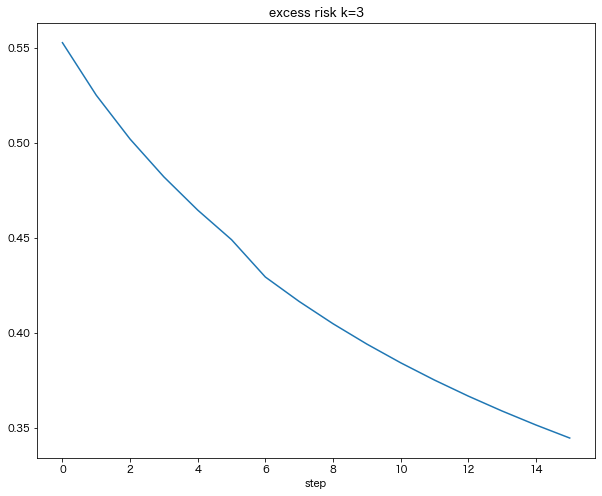

In [11]:
k= 3
tr = hoge.transition(k=k,train_x=data_train,train_y=label_train,transition_x=data_test,transition_y=label_test,model=model)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(tr)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()